# Imports

In [1]:
import numpy as np
import nibabel as nib
import lightning.pytorch as Lit
import matplotlib.pyplot as plt
import torch
import nrrd
import os
import re

%load_ext autoreload
%autoreload 2

# Data exploration

In [2]:
folder_path = "data\HaN-Seg\case_01"
files = [file for file in os.listdir(folder_path) if file.endswith(".nrrd")]
sample_file = files[4]

# read a nrdd file and print the header and shape
data, header = nrrd.read(os.path.join(folder_path, sample_file))

print(f"Example header of file '{sample_file}'\n")
for key in header.keys():
    print(key, ": ", header[key])

Example header of file 'case_01_OAR_A_Carotid_R.seg.nrrd'

type :  unsigned char
dimension :  3
space :  left-posterior-superior
sizes :  [1024 1024  202]
space directions :  [[0.55761719 0.         0.        ]
 [0.         0.55761719 0.        ]
 [0.         0.         2.        ]]
kinds :  ['domain', 'domain', 'domain']
encoding :  gzip
space origin :  [-285.5 -207.5 -759. ]


## Merge all the segmentation files into a single one and move them to the right folders

In [3]:
import shutil
import json
from utils.file_reading import merge_segmentations

# leave false if you have already done it once
merge_segmentations = False

data_folder = "data"
HaN_folder = "data/HaN-Seg"
imagesTr_folder = "data/imagesTr/"
labelsTr_folder = "data/labelsTr/"

if merge_segmentations:
    # copies the CT and MRI to the imagesTr folder and merges the segmentations to the labelsTr folder
    for case in os.listdir(HaN_folder):
        case_path = os.path.join(HaN_folder, case)
        if os.path.isdir(case_path):
            print(case_path)

            # copy the images to the imagesTr folder
            for file in os.listdir(case_path):
                if "IMG" in file:
                    shutil.copy(os.path.join(case_path, file), imagesTr_folder)

            # merge the labels and copy them to the labelsTr folder
            segmentation_files = [
                file for file in os.listdir(case_path) if "OAR" in file
            ]
            merged_segmentation, names_dict = merge_segmentations(
                case_path, segmentation_files
            )

            # save the merged segmentation in the labelsTr folder
            nrrd.write(
                os.path.join(labelsTr_folder, f"{case}_segmentation.nrrd"),
                merged_segmentation,
            )

    # save the names dictionary in a json file in the data folder
    with open(os.path.join(data_folder, "names_dict.json"), "w") as f:
        json.dump(names_dict, f, indent=4)

# Load an image and a label and plot them

In [9]:
from utils.file_reading import load_sample

CT, MRI, segmentation = load_sample(1)

print(f"CT shape: {CT.shape}")
print(f"MRI shape: {MRI.shape}")
print(f"Segmentation shape: {segmentation.shape}")

CT shape: (1024, 1024, 202)
MRI shape: (512, 512, 83)
Segmentation shape: (1024, 1024, 202)


The slice number is too high for the MR image.
If you want to plot the MR image, please choose a slice number lower than 83


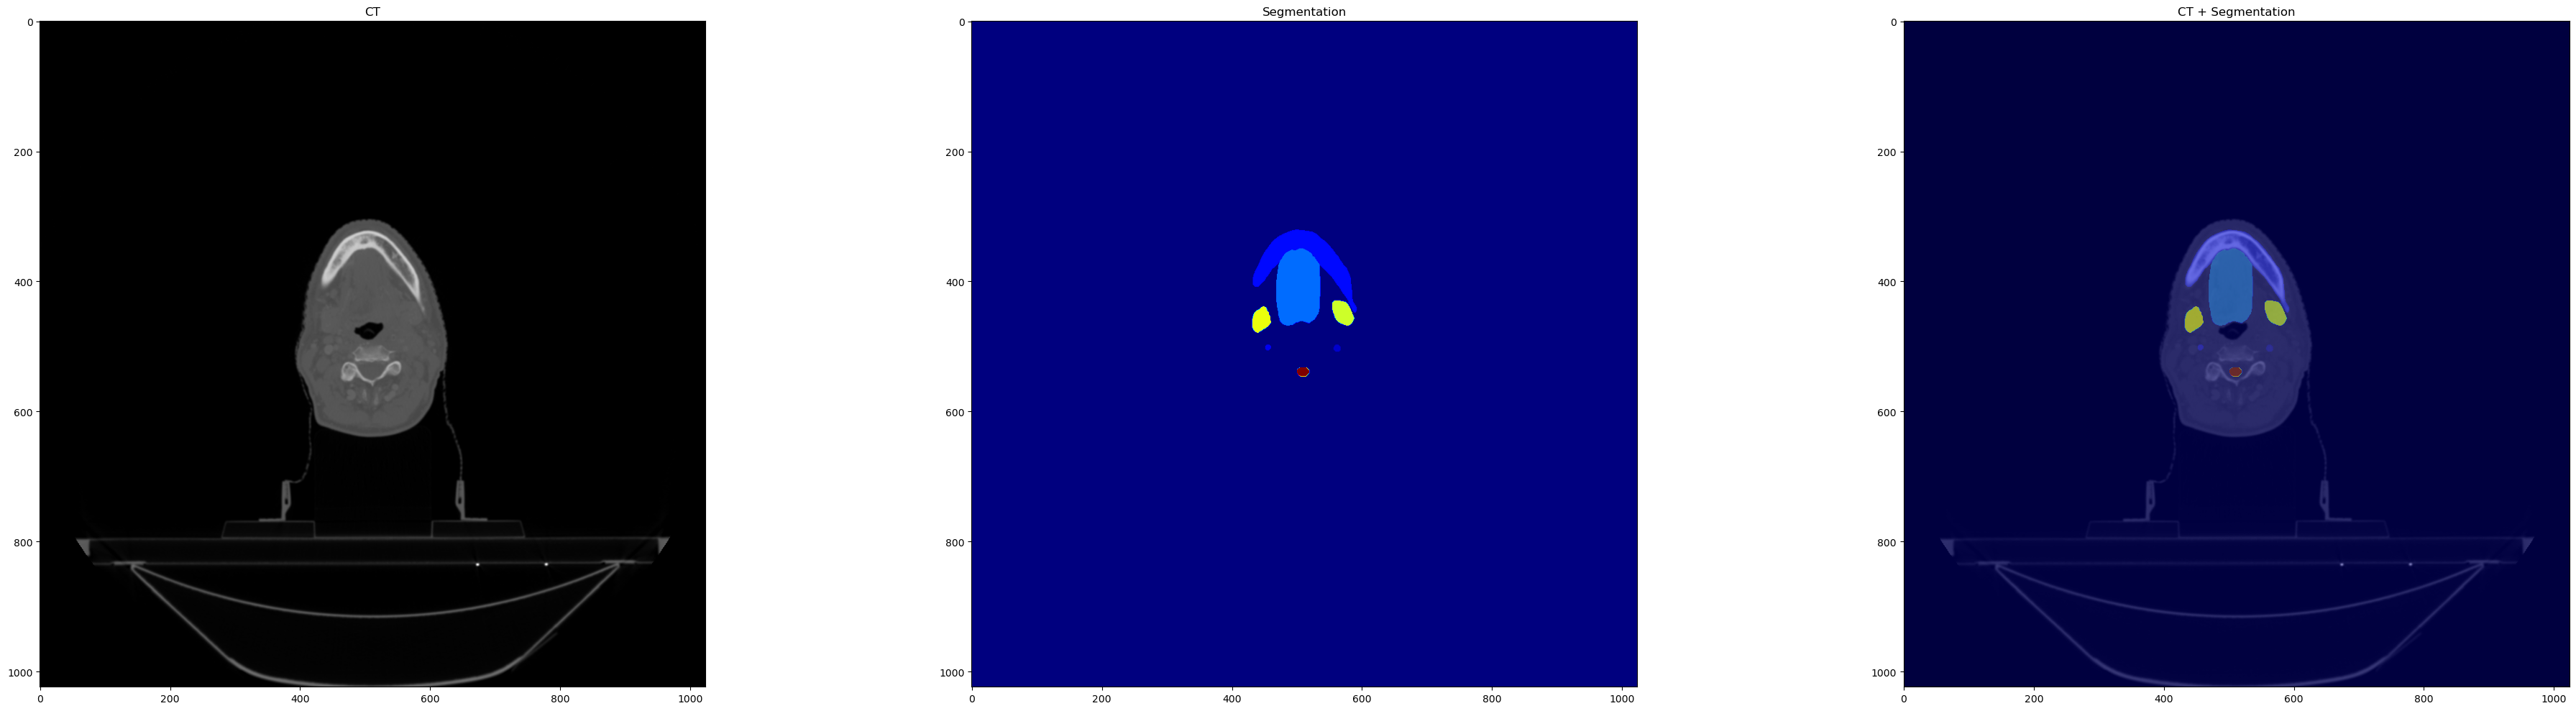

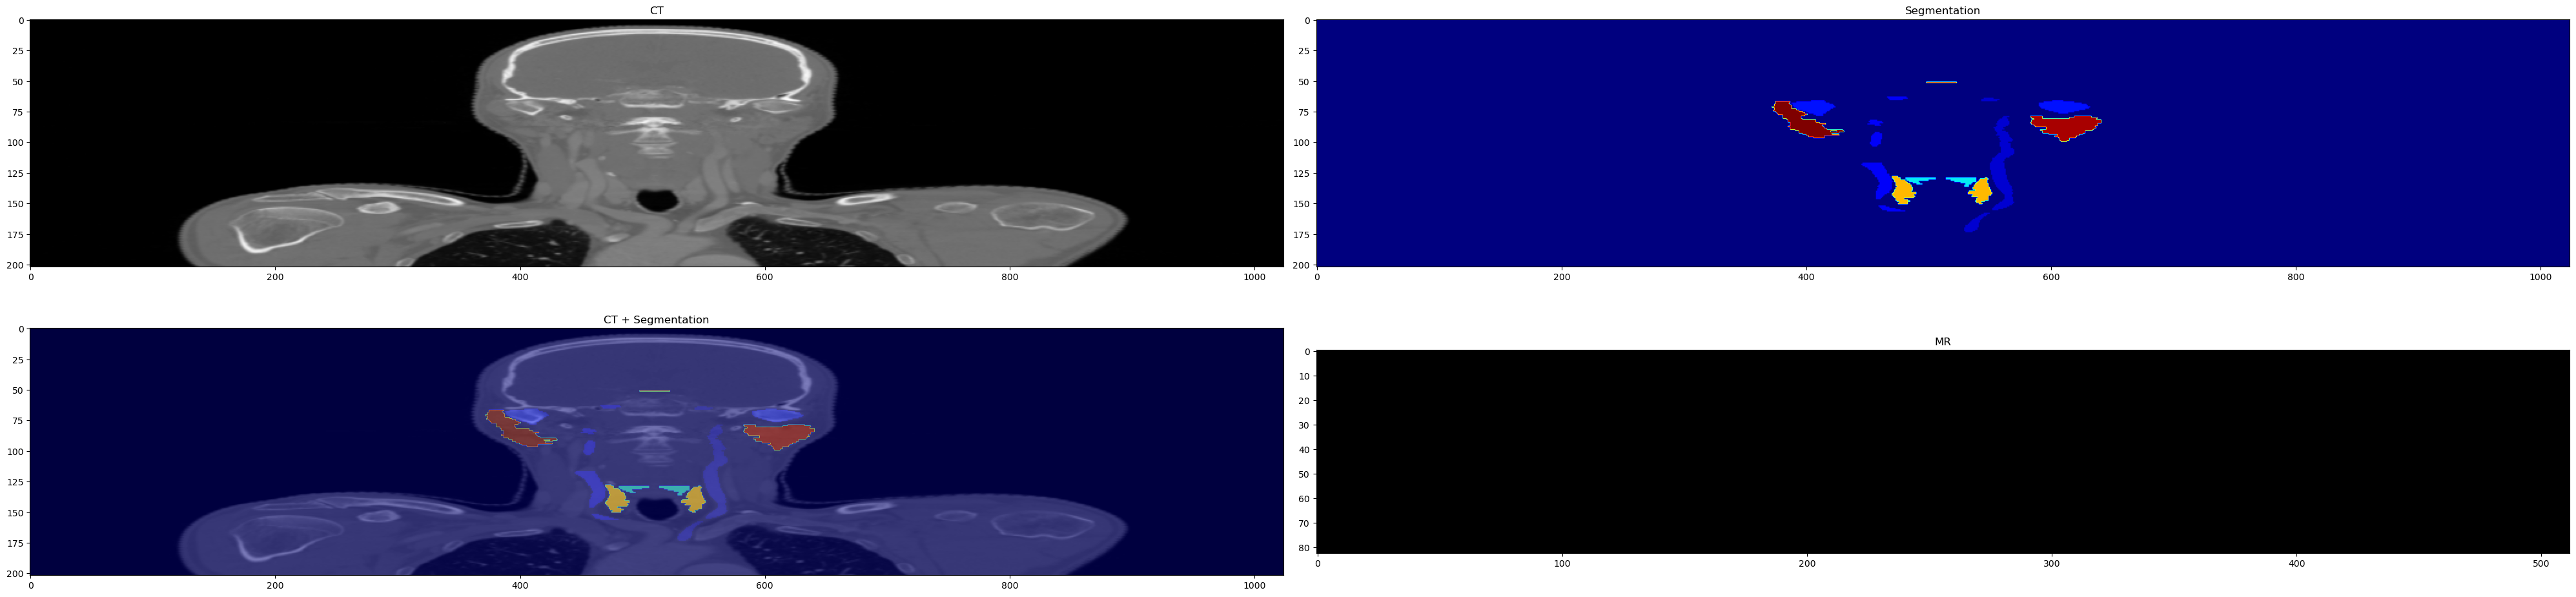

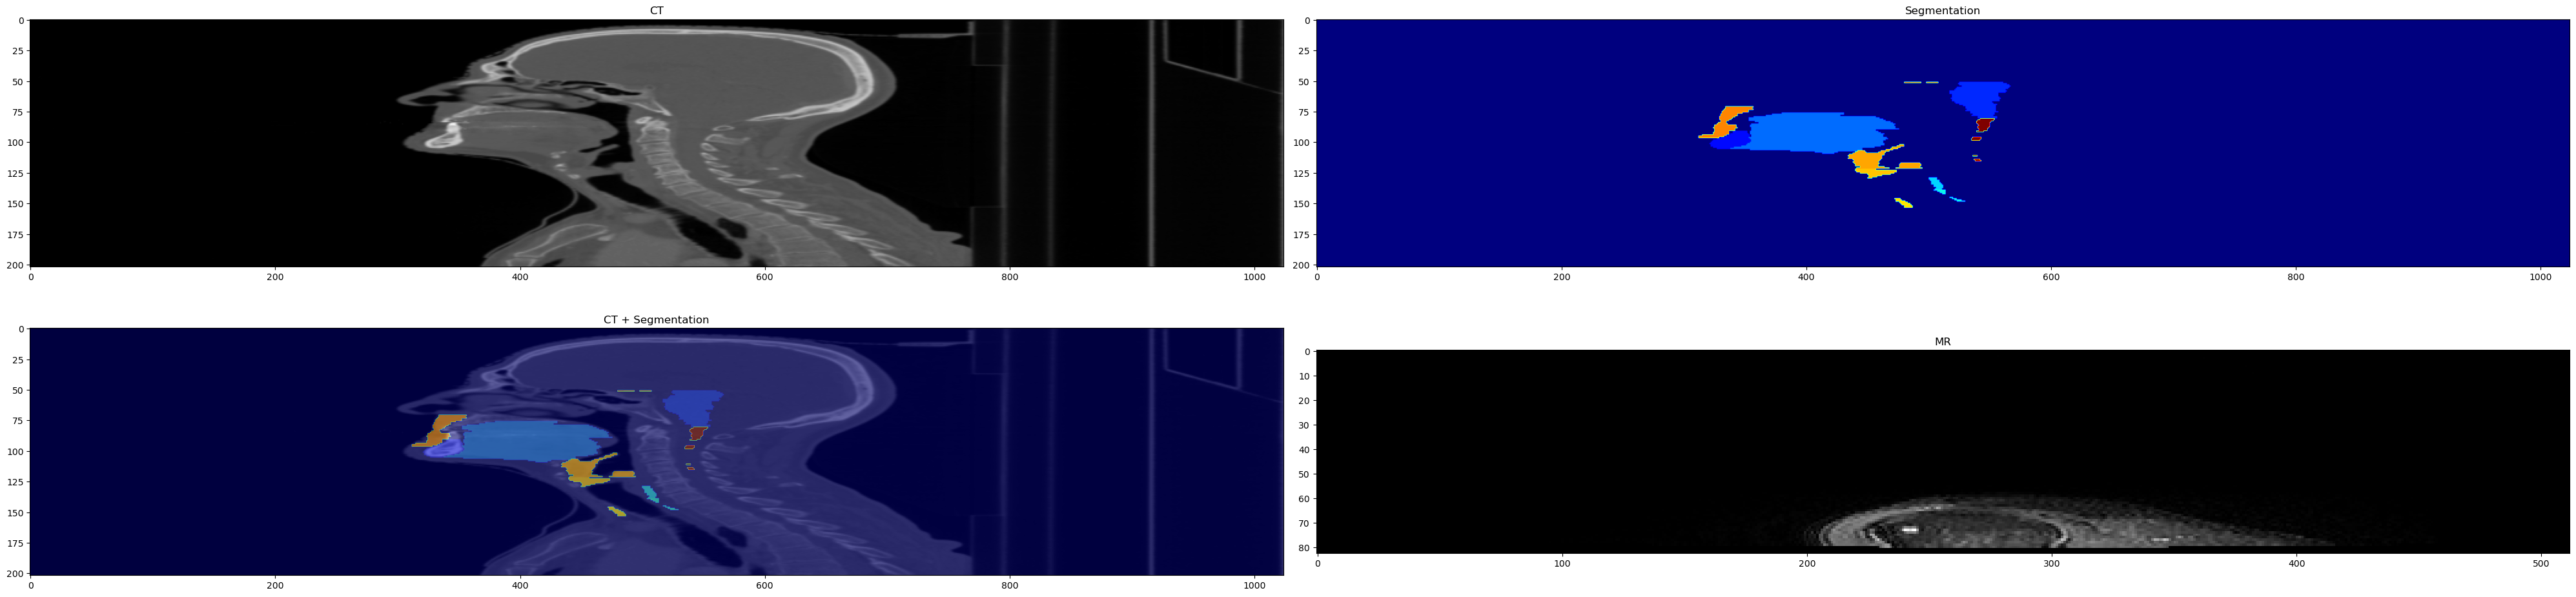

In [54]:
from utils.plotting import plot_sample

# plot a sample along all the planes
plot_sample(plane="a", case_number=1, slice_number=100)
plot_sample(plane="c", case_number=1, slice_number=500)
plot_sample(plane="s", case_number=1, slice_number=500)